<a href="https://colab.research.google.com/github/JamesBarciz/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/James_Barciz_Making_Data_backed_Assertions_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [53]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

import pandas as pd

url = 'https://raw.githubusercontent.com/JamesBarciz/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'

df = pd.read_csv(url)
df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [54]:
#!pip install pandas==0.23.4
pd.__version__

'0.23.4'

In [0]:
age_bins = pd.cut(df['age'], 6, precision=0) # 6 bins to get bins each covering apx 10 years.
weight_bins = pd.cut(df['weight'], 4, precision=0)
time_bins = pd.cut(df['exercise_time'], 3, precision=0) # 3 bins each covering a range of 100 min.

In [56]:
pd.crosstab(time_bins, age_bins, normalize='columns')

# Between Time and Age

age,"(18.0, 28.0]","(28.0, 39.0]","(39.0, 49.0]","(49.0, 59.0]","(59.0, 70.0]","(70.0, 80.0]"
exercise_time,,,,,,
"(-0.0, 100.0]",0.306220,0.368664,0.335,0.304348,0.505208,0.712121
"(100.0, 200.0]",0.373206,0.327189,0.255,0.315217,0.359375,0.287879
"(200.0, 300.0]",0.320574,0.304147,0.410,0.380435,0.135417,0.000000


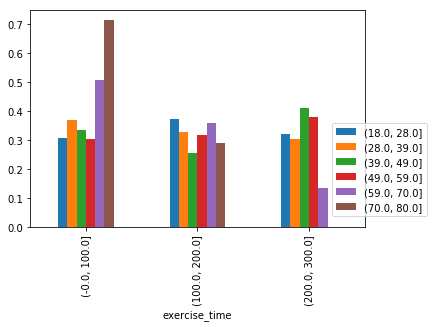

In [57]:
ct1 = pd.crosstab(time_bins, age_bins, normalize='columns')

ct1.plot(kind='bar').legend(bbox_to_anchor=(1.2, 0.5));

In [58]:
pd.crosstab(time_bins, weight_bins, normalize='columns')

# Between time and weight

weight,"(100.0, 136.0]","(136.0, 173.0]","(173.0, 210.0]","(210.0, 246.0]"
exercise_time,,,,
"(-0.0, 100.0]",0.253304,0.365239,0.604743,0.958333
"(100.0, 200.0]",0.319383,0.350126,0.379447,0.041667
"(200.0, 300.0]",0.427313,0.284635,0.015810,0.000000


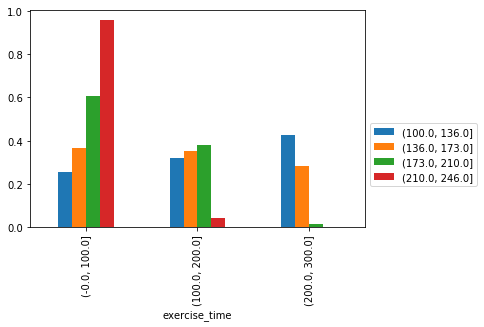

In [59]:
ct2 = pd.crosstab(time_bins, weight_bins, normalize='columns')
ct2.plot(kind='bar').legend(bbox_to_anchor=(1, 0.5));

# The lower the range of weight, the more likely to exercise longer
# The higher the range of weight, the less likely to exercise longer

In [60]:
# Normalizing the columns between weight bins and age bins
pd.crosstab(weight_bins, age_bins, normalize='columns')

age,"(18.0, 28.0]","(28.0, 39.0]","(39.0, 49.0]","(49.0, 59.0]","(59.0, 70.0]","(70.0, 80.0]"
weight,,,,,,
"(100.0, 136.0]",0.382775,0.437788,0.425,0.418478,0.302083,0.297980
"(136.0, 173.0]",0.387560,0.313364,0.335,0.304348,0.333333,0.308081
"(173.0, 210.0]",0.167464,0.193548,0.175,0.211957,0.265625,0.257576
"(210.0, 246.0]",0.062201,0.055300,0.065,0.065217,0.098958,0.136364


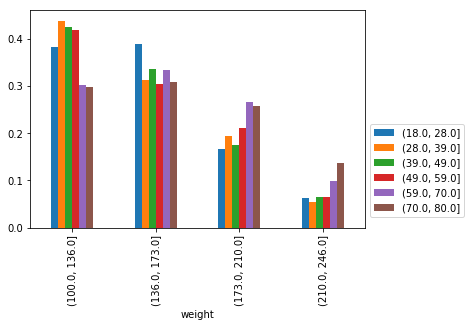

In [61]:
ct3 = pd.crosstab(weight_bins, age_bins, normalize='columns')
ct3.plot(kind='bar').legend(bbox_to_anchor=(1, 0.5));

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
-- The variable types used in the data are a mix of floats and integers.
2.  What are the relationships between the variables?
-- I believe the main relationships are between time spent exercising and both weight and age.
3.  Which relationships are "real", and which spurious?
-- The real relationships are between time spent exercising and either age or weight whereas the relationship between age and weight as well as the id of the hypothetical person are spurious.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)